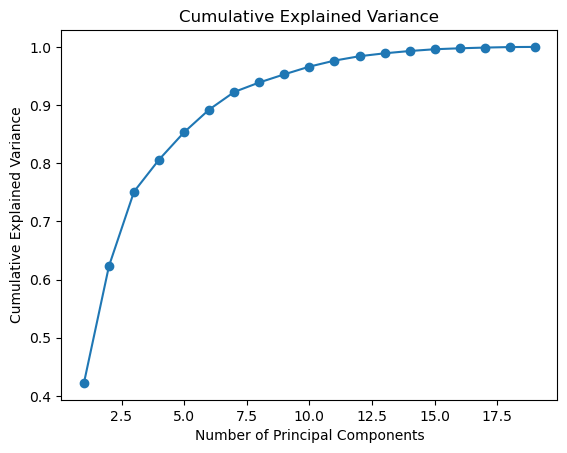

Individual Explained Variance for the first 2 components:
Principal Component 1: 42.22%
Principal Component 2: 20.11%

Eigenvalue Contributions:
Eigenvalue 1: 42.22%
Eigenvalue 2: 20.11%
Eigenvalue 3: 12.79%
Eigenvalue 4: 5.51%
Eigenvalue 5: 4.71%
Eigenvalue 6: 3.90%
Eigenvalue 7: 3.03%
Eigenvalue 8: 1.63%
Eigenvalue 9: 1.40%
Eigenvalue 10: 1.32%
Eigenvalue 11: 1.04%
Eigenvalue 12: 0.75%
Eigenvalue 13: 0.50%
Eigenvalue 14: 0.39%
Eigenvalue 15: 0.31%
Eigenvalue 16: 0.16%
Eigenvalue 17: 0.12%
Eigenvalue 18: 0.09%
Eigenvalue 19: 0.02%


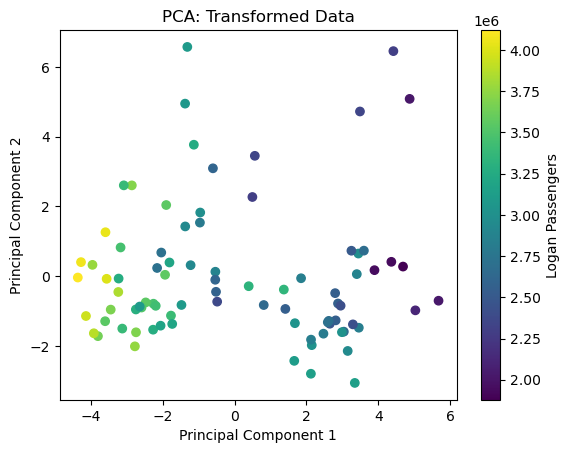

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'C:\Users\prkav\Dropbox\My PC (LAPTOP-VK1I9S1L)\Desktop\economic-indicators.csv')
numeric_data = data.select_dtypes(include=[np.number])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(scaled_data, rowvar=False)

# Step 3: Eigenvalue and eigenvector decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvalues and select principal components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the number of principal components
k = 2  # Choose the desired number of principal components

# Step 6: Transform the data
principal_components = sorted_eigenvectors[:, :k]
transformed_data = np.dot(scaled_data, principal_components)

# Step 7: Explained variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Step 8: Visualize the explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Additional Step: Display individual explained variances
individual_explained_variance = explained_variance_ratio[:k]
print("Individual Explained Variance for the first {} components:".format(k))
for i in range(k):
    print("Principal Component {}: {:.2%}".format(i + 1, individual_explained_variance[i]))

# Additional Step: Display eigenvalues and their contributions
total_variance = np.sum(sorted_eigenvalues)
eigenvalue_contributions = sorted_eigenvalues / total_variance
print("\nEigenvalue Contributions:")
for i in range(len(sorted_eigenvalues)):
    print("Eigenvalue {}: {:.2%}".format(i + 1, eigenvalue_contributions[i]))

# Step 9: Visualize the transformed data with color based on 'logan_passengers'
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=data['logan_passengers'], cmap='viridis')
plt.title('PCA: Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Logan Passengers')  # Add colorbar for reference
plt.show()
